In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### iloc | loc

In [4]:
df_new = df.iloc[[3,5,10,13], 0:3] # integer location
df_new

,enrollee_id,city,city_development_index
3,33241,city_115,0.789
5,21651,city_176,0.764
10,29452,city_21,0.624
13,5826,city_21,0.624


In [5]:
df_new.index = ['Cersei', 'Tywin', 'Joffrey', 'John Snow']
df_new

,enrollee_id,city,city_development_index
Cersei,33241,city_115,0.789
Tywin,21651,city_176,0.764
Joffrey,29452,city_21,0.624
John Snow,5826,city_21,0.624


In [6]:
df_new.loc[['Cersei', 'Joffrey']] # loc 
# если не указан слайс столбцов - выводятся все
# если строки - int, то выводятся строки, включающие границы слайса

,enrollee_id,city,city_development_index
Cersei,33241,city_115,0.789
Joffrey,29452,city_21,0.624


In [7]:
df_new.loc[df_new['city_development_index'] < 0.7] # loc принимает на вход массив булевых значений

,enrollee_id,city,city_development_index
Joffrey,29452,city_21,0.624
John Snow,5826,city_21,0.624


In [8]:
df_new['city_development_index'] < 0.7 # массив булевых значений

Cersei       False
Tywin        False
Joffrey       True
John Snow     True
Name: city_development_index, dtype: bool

In [9]:
df_new[(df_new['city_development_index'] < 0.7) | (df_new['enrollee_id'] == 33241)]

,enrollee_id,city,city_development_index
Cersei,33241,city_115,0.789
Joffrey,29452,city_21,0.624
John Snow,5826,city_21,0.624


In [10]:
df['city'] # Series
df[['city', 'city_development_index']] # Dataframe
print(df.city_development_index.sum()) # сумма
print(df.city_development_index.mean()) # среднее
print(df.city_development_index.median()) # медиана
print(df.city_development_index.product()) # перемножение
print(df.city_development_index.std()) # среднеквадратичное отклонение
print(df.city_development_index.var()) # дисперсия
len(df) # длина
df.shape # форма

15879.070000000002
0.8288480008351684
0.903
0.0
0.12336175686055084
0.015218123055721663


(19158, 14)

In [11]:
df1 = df.rename(index={0: 'Ivanov', 1: 'Vasilev'}) # переименование лэйблов строк 
df1 = df1.rename(columns={'city': 'TOWN', 'gender': 'SEX'}) # переименование колонок
df1.head(3)

,enrollee_id,TOWN,city_development_index,SEX,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
Ivanov,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
Vasilev,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [12]:
df.drop('city_development_index', axis=1).head(3) # Удалить столбец (создать копию без столбца)

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [13]:
df.columns # Список столбцов

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [14]:
# добавить новый столбец
df['new_col_1'] = 1
df['new_col_2'] = df['city_development_index'] / 3
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.306667
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.258667
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000


In [15]:
df.assign(new_col_3=99).head(3) # добавляет столбец (создает копию с новым столбцом)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2,new_col_3
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.306667,99
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.258667,99
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000,99


### Фильтрация

In [16]:
df[(df['city'] == 'city_40')&(df['gender'] == 'Female')] # ссылается на исходные данные

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.258667
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.258667
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.258667
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.258667
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.258667
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.258667


In [17]:
df.query('city == "city_40" and gender == "Female"') # ссылается на исходные данные (and-&, or-|)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.258667
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.258667
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.258667
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.258667
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.258667
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.258667


In [18]:
tr_hours_mean = df.training_hours.mean()
df.query('training_hours > @tr_hours_mean') # @ для выделения переменной из строки

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0,1,0.306667
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0,1,0.306667
16,4167,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,never,106,0.0,1,0.306667
19,11399,city_13,0.827,Female,Has relevent experience,no_enrollment,Graduate,Arts,4,NaN,NaN,1,132,1.0,1,0.275667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19135,20520,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Public Sector,2,136,0.0,1,0.267333
19137,22620,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,>4,80,0.0,1,0.208000
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0,1,0.241667
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.267333


In [19]:
df.filter(like='enroll')

,enrollee_id,enrolled_university
0,8949,no_enrollment
1,29725,no_enrollment
2,11561,Full time course
3,33241,NaN
4,666,no_enrollment
...,...,...
19153,7386,no_enrollment
19154,31398,no_enrollment
19155,24576,no_enrollment
19156,5756,no_enrollment


In [20]:
city_40_female = df[(df['city'] == 'city_40')&(df['gender'] == 'Female')] # ссылается на исходные данные

In [21]:
city_40_female['new_col_3'] = 3 # ошибка цепной связи датафреймов

C:\Users\Admin\AppData\Local\Temp\ipykernel_10840\2559556172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_40_female['new_col_3'] = 3 # ошибка цепной связи датафреймов


In [22]:
city_40_female_c = df[(df['city'] == 'city_40')&(df['gender'] == 'Female')].copy() # НЕ ссылается на исходные данные

In [23]:
city_40_female_c['new_col_3'] = 3 # НЕТ ошибки

### Пропуски

In [24]:
df.isna().mean().sort_values(ascending=False) # процент пропусков

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
new_col_1                 0.000000
new_col_2                 0.000000
dtype: float64

In [25]:
df.info() # количество ненулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  new_col_1               19158 non-null

In [26]:
df.dtypes # типы данных

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
new_col_1                   int64
new_col_2                 float64
dtype: object

### Типы переменных

In [27]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<AxesSubplot:>

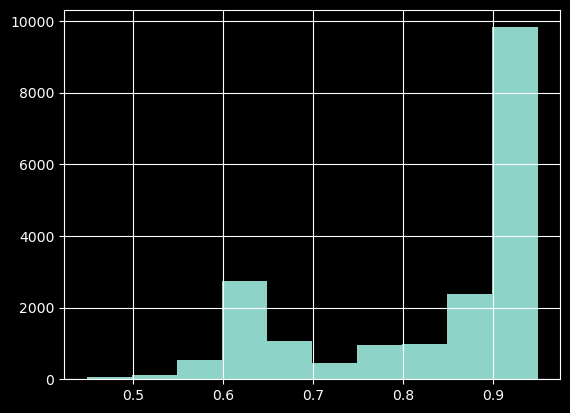

In [28]:
df['city_development_index'].hist()

In [29]:
df.describe() # информация по переменным с числовым типом данных

,enrollee_id,city_development_index,training_hours,target,new_col_1,new_col_2
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.0,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348,1.0,0.276283
std,9616.292592,0.123362,60.058462,0.432647,0.0,0.041121
min,1.000000,0.448000,1.000000,0.000000,1.0,0.149333
25%,8554.250000,0.740000,23.000000,0.000000,1.0,0.246667
50%,16982.500000,0.903000,47.000000,0.000000,1.0,0.301000
75%,25169.750000,0.920000,88.000000,0.000000,1.0,0.306667
max,33380.000000,0.949000,336.000000,1.000000,1.0,0.316333


In [30]:
df['gender'].value_counts(dropna=False) # подсчет некатегориальных переменных
df['gender'].value_counts(normalize=True, dropna=False)

Male      0.690103
NaN       0.235306
Female    0.064621
Other     0.009970
Name: gender, dtype: float64

### Фильтрация по квантилю (удаление выбросов)

In [31]:
q = df['city_development_index'].quantile(0.25)
q

0.74

In [32]:
len(df[df['city_development_index'] < q]) / len(df)

0.24903434596513205

In [33]:
q1 = df['city_development_index'].quantile(0.10)
q2 = df['city_development_index'].quantile(0.90)

<AxesSubplot:>

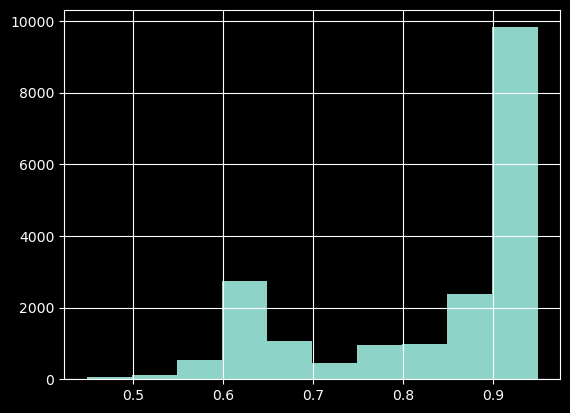

In [34]:
df['city_development_index'].hist() # начальная гистограмма

<AxesSubplot:>

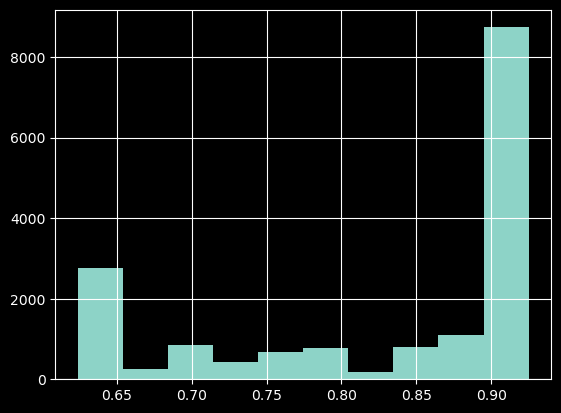

In [35]:
df[df['city_development_index'].between(q1, q2)]['city_development_index'].hist() # гистограмма без выбросов

### Сводники

In [36]:
df.head(3) # target = 1 хочет 0 не хочет

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.306667
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.258667
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000


In [37]:
df['target'].mean() # общее среднее желающих сменить работу

0.24934753105752167

In [38]:
df.groupby('gender', dropna=False)['target'].mean() # среднее по группам
df.groupby('gender', dropna=False)['target'].agg('mean') # среднее по группам
df.groupby('gender', dropna=False, as_index=False).agg({'target': 'mean'}) # среднее по группам

,gender,target
0,Female,0.263328
1,Male,0.227819
2,Other,0.261780
3,NaN,0.308119


In [39]:
t = df.groupby('gender')['target'].agg(['count', 'mean']) # количество и среднее по группам
t

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780


In [40]:
t['count'].sum(), len(df) # сумма count без учета пропусков

(14650, 19158)

In [41]:
t = df.groupby('gender', dropna=False)['target'].agg(['count', 'mean']) # количество и среднее по группам
t 

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [42]:
t['count'].sum(), len(df) # количество с пропусками

(19158, 19158)

In [43]:
df.groupby('education_level', dropna=False)['target'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
education_level,,
Graduate,11598,0.279790
NaN,460,0.226087
Masters,4361,0.214400
High School,2017,0.195340
Phd,414,0.140097
Primary School,308,0.133117


<AxesSubplot:xlabel='education_level'>

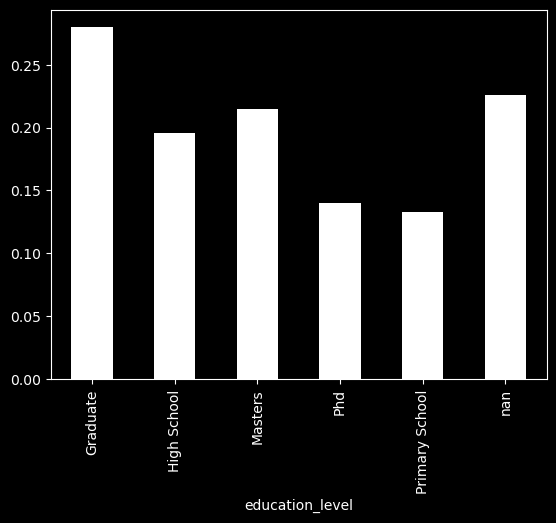

In [44]:
df.groupby('education_level', dropna=False)['target'].mean().plot(kind='bar', color = 'w')

### Мультииндексы

In [45]:
df_multi = df.groupby(['gender', 'major_discipline'], as_index=False).aggregate({'training_hours': 'mean', 'target': 'mean'})
df_multi # не мультииндекс

,gender,major_discipline,training_hours,target
0,Female,Arts,57.416667,0.250000
1,Female,Business Degree,69.200000,0.280000
2,Female,Humanities,62.313559,0.237288
3,Female,No Major,47.250000,0.500000
4,Female,Other,65.472222,0.277778
5,Female,STEM,67.010776,0.262931
6,Male,Arts,61.525000,0.206250
7,Male,Business Degree,68.601770,0.252212
8,Male,Humanities,65.787879,0.202797
9,Male,No Major,64.883436,0.226994


In [46]:
df_multi = df.groupby(['gender', 'major_discipline'], as_index=True).aggregate({'training_hours': 'mean', 'target': 'mean'})
df_multi # мультииндекс

training_hours    target
gender major_discipline                          
Female Arts                   57.416667  0.250000
       Business Degree        69.200000  0.280000
       Humanities             62.313559  0.237288
       No Major               47.250000  0.500000
       Other                  65.472222  0.277778
       STEM                   67.010776  0.262931
Male   Arts                   61.525000  0.206250
       Business Degree        68.601770  0.252212
       Humanities             65.787879  0.202797
       No Major               64.883436  0.226994
       Other                  67.230769  0.234818
       STEM                   64.836175  0.238738
Other  Arts                   66.571429  0.285714
       Business Degree        66.333333  0.000000
       Humanities             29.375000  0.250000
       No Major               68.666667  0.000000
       Other                  31.857143  0.142857
       STEM                   65.286957  0.304348

In [47]:
df_multi.loc[('Male', 'Arts')] # Указываем два индекса

training_hours    61.52500
target             0.20625
Name: (Male, Arts), dtype: float64

In [48]:
df_multi.loc[[('Male', 'Arts'), ('Male', 'STEM')]]

training_hours    target
gender major_discipline                          
Male   Arts                   61.525000  0.206250
       STEM                   64.836175  0.238738

In [49]:
df.groupby(['gender', 'major_discipline']).company_type.nunique()

gender  major_discipline
Female  Arts                5
        Business Degree     4
        Humanities          5
        No Major            2
        Other               4
        STEM                6
Male    Arts                6
        Business Degree     6
        Humanities          6
        No Major            6
        Other               6
        STEM                6
Other   Arts                3
        Business Degree     1
        Humanities          3
        No Major            1
        Other               2
        STEM                6
Name: company_type, dtype: int64

### Сводники для непрерывных переменных

In [50]:
df.head(3) # target = 1 хочет 0 не хочет

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.306667
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.258667
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000


In [51]:
df.groupby('city_development_index', dropna=False)['target'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
city_development_index,,
0.664,1,1.000000
0.487,5,0.800000
0.556,14,0.785714
0.563,13,0.692308
0.518,6,0.666667
...,...,...
0.898,11,0.000000
0.788,7,0.000000
0.693,4,0.000000


In [52]:
df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) # нарезка в 5 групп (разбивка на бакеты)
pd.cut(df['city_development_index'], 5)

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [53]:
df.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
city_development_index_group,,
"(0.548, 0.648]",3297,0.582651
"(0.447, 0.548]",178,0.578652
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


<AxesSubplot:>

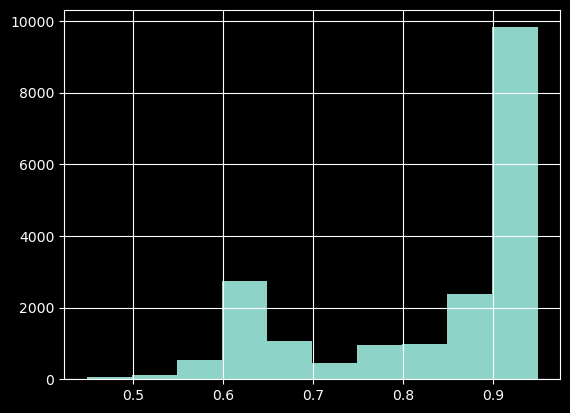

In [54]:
df['city_development_index'].hist()

In [55]:
n = 5
df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], n, duplicates='drop') # нарезка в n равных групп

In [56]:
t = df.groupby('city_development_index_group_q', dropna=False)['target'].agg(['count', 'mean']).sort_values('mean', ascending=False)
t

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [57]:
t['count'].sum()

19158

<AxesSubplot:xlabel='city_development_index_group_q'>

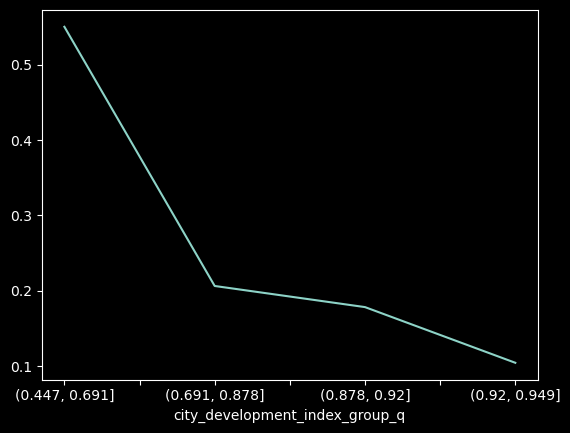

In [58]:
t['mean'].plot() # чем больше индекс города тем меньше среднее желание сменить работу

In [59]:
 # нарезка по интервалам
intervals = [-float('inf'), 0.1, 0.2, 0.5, float('inf')]

df['city_development_index_group_q_custom'] = pd.cut(df['city_development_index'], intervals, duplicates='drop')

In [60]:
df.groupby('city_development_index_group_q_custom', dropna=False)['target'].agg(['count', 'mean']).sort_values('mean')

,count,mean
city_development_index_group_q_custom,,
"(0.5, inf]",19095,0.248233
"(0.2, 0.5]",63,0.587302
"(-inf, 0.1]",0,NaN
"(0.1, 0.2]",0,NaN


### Группировка категориальных переменных

In [61]:
df.groupby('education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


In [62]:
def education_group(x): # x - это значение ячейки таблицы
    if x in ['High School', 'Primary School']:
        return 'School'
    elif x in ['Masters', 'Phd']:
        return 'Masters_and_phd'
    return x

In [63]:
df['education_level'].apply(education_group)

0               Graduate
1               Graduate
2               Graduate
3               Graduate
4        Masters_and_phd
              ...       
19153           Graduate
19154           Graduate
19155           Graduate
19156             School
19157             School
Name: education_level, Length: 19158, dtype: object

In [64]:
df['new_education_level'] = df['education_level'].apply(education_group)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col_1,new_col_2,city_development_index_group,city_development_index_group_q,city_development_index_group_q_custom,new_education_level
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.258667,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.208000,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.263000,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.255667,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_phd


In [65]:
df.groupby('new_education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [66]:
df['education_level'] = df['education_level'].replace('Primary School', 'School') # как аналог функции и apply

In [67]:
d = {'Primary School': 'School'}
df['education_level'].map(d) # как аналог функции, apply, replace

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
19153    NaN
19154    NaN
19155    NaN
19156    NaN
19157    NaN
Name: education_level, Length: 19158, dtype: object

### Функция с несколькими столбцами

In [68]:
# добавить всем Phd по 1000 часов обучения

def new_training_hours(row): # row строка датафрейма
    if row['education_level'] == 'Phd':
        return row['training_hours'] + 1000
    return row['training_hours']

In [69]:
df.apply(new_training_hours, axis=1)

0         36
1         47
2         83
3         52
4          8
        ... 
19153     42
19154     52
19155     44
19156     97
19157    127
Length: 19158, dtype: int64

In [70]:
df['new_training_hours'] = df.apply(new_training_hours, axis=1)

In [71]:
df[df['education_level'] == 'Phd']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,target,new_col_1,new_col_2,city_development_index_group,city_development_index_group_q,city_development_index_group_q_custom,new_education_level,new_training_hours
37,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,...,4,42,1.0,1,0.308667,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_phd,1042
121,13915,city_16,0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,...,2,20,1.0,1,0.303333,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_phd,1020
130,3921,city_36,0.893,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,...,>4,4,0.0,1,0.297667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_phd,1004
135,23947,city_103,0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,...,NaN,70,0.0,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_phd,1070
152,31786,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,...,>4,14,0.0,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_phd,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,1477,city_162,0.767,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,...,1,34,0.0,1,0.255667,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_phd,1034
18800,18365,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,15,50-99,...,4,108,0.0,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_phd,1108
18807,229,city_114,0.926,Male,No relevent experience,no_enrollment,Phd,STEM,14,5000-9999,...,>4,9,1.0,1,0.308667,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_phd,1009
18944,2678,city_104,0.924,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,...,NaN,27,0.0,1,0.308000,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_phd,1027


### Pivot table

In [72]:
df.groupby('new_education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [73]:
# dropna в pivot-table исключает столбцы со всеми NaN (а не подсчитывает значения NaN)
# поэтому заполняем пропуски
df['new_education_level'] = df['new_education_level'].fillna('no_info') 

In [74]:
t = df.pivot_table(index='new_education_level', values='target', aggfunc=['count', 'mean'])
t
# dropna - исключает столбцы со всеми NaN

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [75]:
t.reset_index() # избавляемся от "индекса"

,new_education_level,count,mean
,,target,target
0,Graduate,11598,0.279790
1,Masters_and_phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


In [76]:
t.columns = ['_'.join(col).strip() for col in t.columns.values] # склеить двухэтажные столбцы
t = t.reset_index() # избавиться от "индекса" new_education_level на другой строке

In [77]:
t

,new_education_level,count_target,mean_target
0,Graduate,11598,0.279790
1,Masters_and_phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


но пивот умеет добавлять доп разбиение в столбцы

In [78]:
df.pivot_table(index='new_education_level', columns = 'gender', values='target', aggfunc=['count', 'mean'])

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters_and_phd        386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128
no_info                  8   242     9  0.125000  0.169421  0.222222

groupby умеет добавлять доп разбиение только в строки

In [79]:
df.groupby(['new_education_level', 'gender'], dropna=False)['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters_and_phd     Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
no_info             Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

In [80]:
t = (df.groupby('new_education_level', dropna=False)
     [['target', 'city_development_index']]
     .agg(['count', 'mean']).reset_index())

In [81]:
t

new_education_level target           city_development_index          
                       count      mean                  count      mean
0            Graduate  11598  0.279790                  11598  0.823731
1     Masters_and_phd   4775  0.207958                   4775  0.840032
2              School   2325  0.187097                   2325  0.836080
3             no_info    460  0.226087                    460  0.805207

In [82]:
t.columns = ['_'.join(col).strip() for col in t.columns.values] # склеить двухэтажные столбцы
t

,new_education_level_,target_count,target_mean,city_development_index_count,city_development_index_mean
0,Graduate,11598,0.279790,11598,0.823731
1,Masters_and_phd,4775,0.207958,4775,0.840032
2,School,2325,0.187097,2325,0.836080
3,no_info,460,0.226087,460,0.805207


### Heatmap

In [83]:
df['gender'] = df['gender'].fillna('no_info')

In [84]:
t = df.pivot_table(index='new_education_level', columns = 'gender', values='target', aggfunc=['mean'])
t

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters_and_phd      0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

<AxesSubplot:xlabel='None-gender', ylabel='new_education_level'>

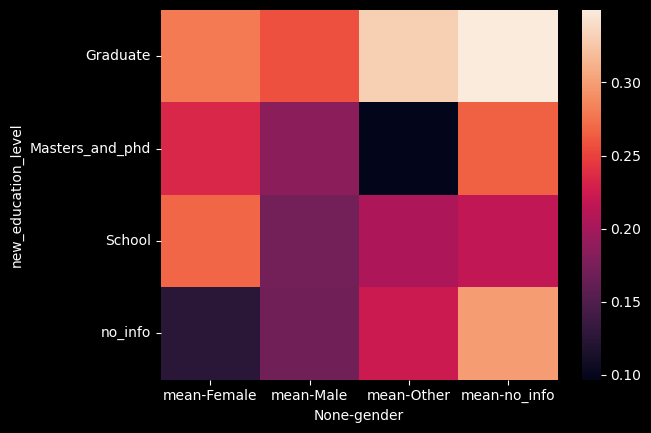

In [85]:
import seaborn as sns
sns.heatmap(t)

In [86]:
df.pivot_table(index='new_education_level', columns = 'gender', values='target', aggfunc=['count'])

count                    
gender              Female  Male Other no_info
new_education_level                           
Graduate               773  8144   112    2569
Masters_and_phd        386  3237    31    1121
School                  71  1598    39     617
no_info                  8   242     9     201

### Корреляция и phik

корреляция - коэффициент показывающий силу линейной связи между двумя переменными

phik - реагирует на нелинейные связи. находит связи с некатегориальными переменными

In [87]:
t = df[['city_development_index', 'training_hours', 'target']].corr()
t

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


<AxesSubplot:>

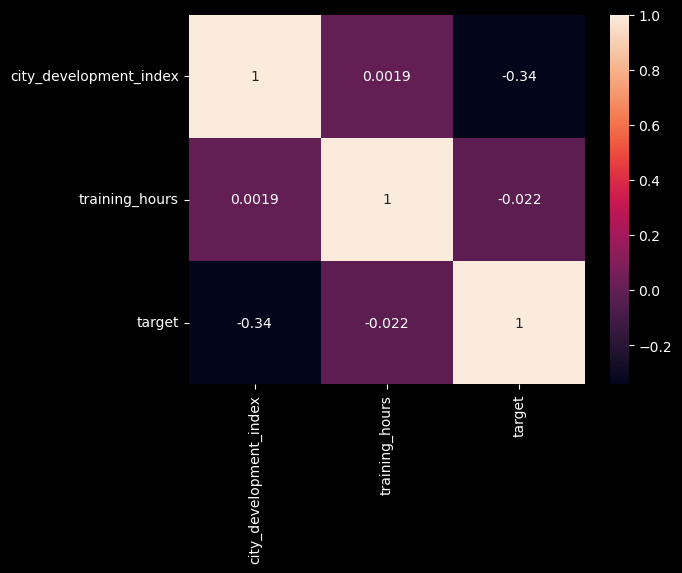

In [88]:
sns.heatmap(t, annot=True)

### Проверяем есть ли связь

In [89]:
df['city_development_index_group_q']

0         (0.878, 0.92]
1        (0.691, 0.878]
2        (0.447, 0.691]
3        (0.691, 0.878]
4        (0.691, 0.878]
              ...      
19153    (0.691, 0.878]
19154     (0.878, 0.92]
19155     (0.878, 0.92]
19156    (0.691, 0.878]
19157    (0.691, 0.878]
Name: city_development_index_group_q, Length: 19158, dtype: category
Categories (4, interval[float64, right]): [(0.447, 0.691] < (0.691, 0.878] < (0.878, 0.92] < (0.92, 0.949]]

In [90]:
df.groupby('city_development_index_group_q')['target'].agg(['count', 'mean'])
# чем меньше индекс города тем больше желание сменить работу

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [91]:
t = df.groupby('city')['target'].agg(['count', 'mean'])
t

,count,mean
city,,
city_1,26,0.115385
city_10,86,0.104651
city_100,275,0.236364
city_101,75,0.573333
city_102,304,0.171053
...,...,...
city_93,26,0.192308
city_94,26,0.384615
city_97,104,0.076923


In [92]:
t.sort_values('count', ascending=False).head(10) # топ 10 городов по населению

,count,mean
city,,
city_103,4355,0.213088
city_21,2702,0.591044
city_16,1533,0.116765
city_114,1336,0.099551
city_160,845,0.235503
city_136,586,0.104096
city_67,431,0.132251
city_75,305,0.101639
city_102,304,0.171053


<AxesSubplot:xlabel='city'>

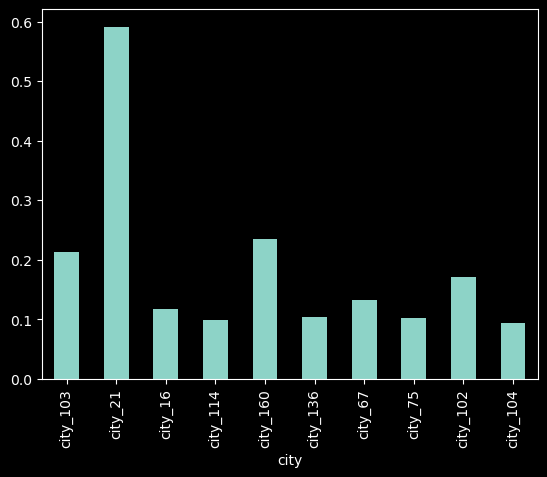

In [93]:
t.sort_values('count', ascending=False).head(10)['mean'].plot(kind='bar')

In [94]:
t = df.groupby('city')[['target', 'city_development_index']].agg(['count', 'mean'])

In [95]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [96]:
t.sort_values('target_count', ascending=False).head(10) # внимание на индекс второго города (индекс маленький - таргет большой)

,target_count,target_mean,city_development_index_count,city_development_index_mean
city,,,,
city_103,4355,0.213088,4355,0.920
city_21,2702,0.591044,2702,0.624
city_16,1533,0.116765,1533,0.910
city_114,1336,0.099551,1336,0.926
city_160,845,0.235503,845,0.920
city_136,586,0.104096,586,0.897
city_67,431,0.132251,431,0.855
city_75,305,0.101639,305,0.939
city_102,304,0.171053,304,0.804


In [97]:
df.groupby('experience')['target'].agg(['count', 'mean'])

,count,mean
experience,,
1,549,0.424408
10,985,0.210152
11,664,0.227410
12,494,0.186235
13,399,0.192982
14,586,0.182594
15,686,0.166181
16,508,0.141732
17,342,0.166667


In [98]:
# заменяем пропуски на -1 строки на инты
df['experience_int'] = df['experience'].replace('<1', '0').replace('>20', '999').fillna(-1).astype(int)

In [99]:
df['experience_group'] = pd.qcut(df['experience_int'], 5)

In [100]:
df.groupby('experience_group')['target'].agg(['count', 'mean']) # чем меньше опыт тем больше желание сменить работу

,count,mean
experience_group,,
"(-1.001, 4.0]",5020,0.358964
"(4.0, 6.0]",2646,0.285336
"(6.0, 11.0]",4459,0.239740
"(11.0, 18.0]",3295,0.170561
"(18.0, 999.0]",3738,0.157571


<AxesSubplot:xlabel='experience_group'>

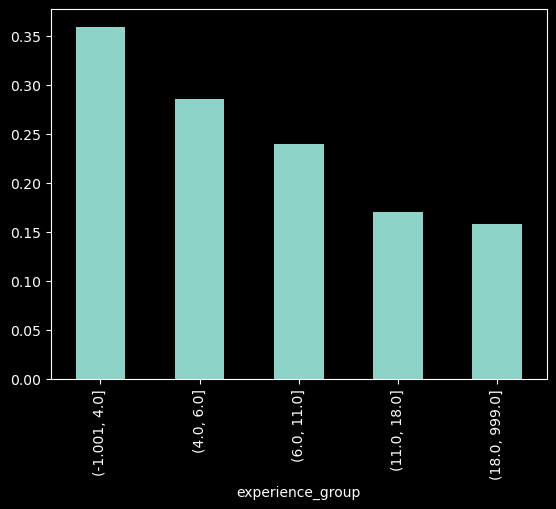

In [101]:
df.groupby('experience_group')['target'].mean().plot(kind='bar')

### Тестовые датафреймы (создание своего датасета)

In [102]:
t = pd.DataFrame({'col1': [1,2,3, float('nan')],
                  'col2': ['a', 'b', 'c', 'd'], 
                  'col3': [0]*3 + [1]*1})
t

,col1,col2,col3
0,1.0,a,0
1,2.0,b,0
2,3.0,c,0
3,NaN,d,1


### Функции агрегации

In [103]:
t = pd.DataFrame({'col1': [1,2,3, float('nan')]})
t

,col1
0,1.0
1,2.0
2,3.0
3,NaN


In [104]:
t['col1'].sum()

6.0

In [105]:
t['col1'].mean() # NaN не учитывается в Sr / N

2.0

In [106]:
t['col1'].count() # NaN не учитывается

3

### -------------- Визуализация --------------

<AxesSubplot:>

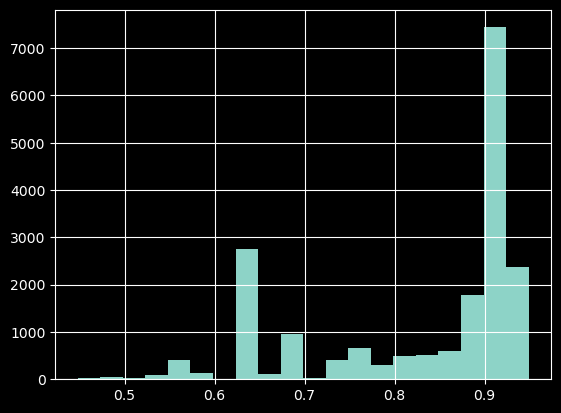

In [107]:
df['city_development_index'].hist(bins=20)

In [108]:
df['gender'].value_counts() # не видит пропуски, но есть dropna

Male       13221
no_info     4508
Female      1238
Other        191
Name: gender, dtype: int64

<AxesSubplot:>

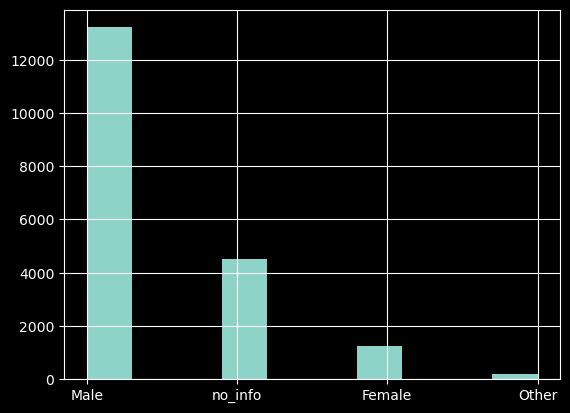

In [109]:
df['gender'].hist()

In [110]:
df['gender'] = df['gender'].replace('no_info', float('nan')) 

<AxesSubplot:>

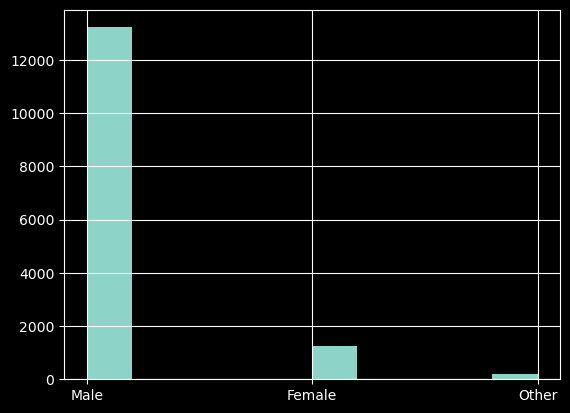

In [111]:
df['gender'].hist() # не видит пропуски

<AxesSubplot:>

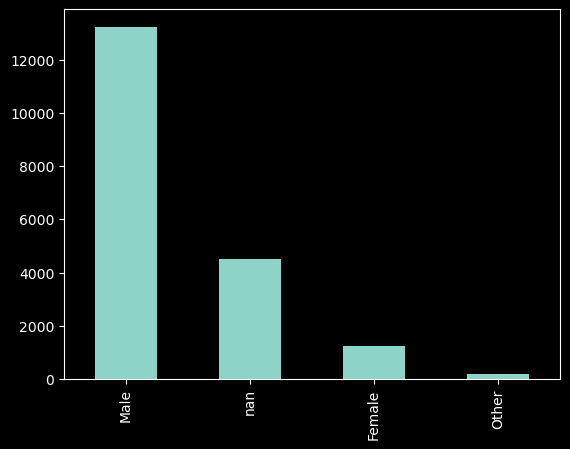

In [112]:
df['gender'].value_counts(dropna=False).plot(kind='bar')

In [113]:
t = pd.DataFrame({'x': [1,2,3], 'y': [1,3,2]})

<AxesSubplot:xlabel='x', ylabel='y'>

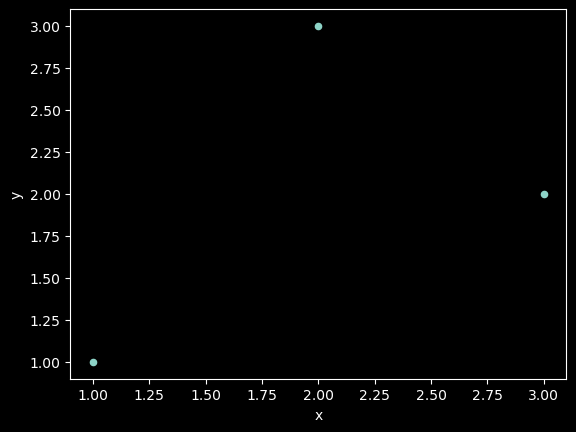

In [114]:
t.plot(x='x', y='y', kind='scatter', grid=False)

<AxesSubplot:xlabel='city_development_index', ylabel='experience_int'>

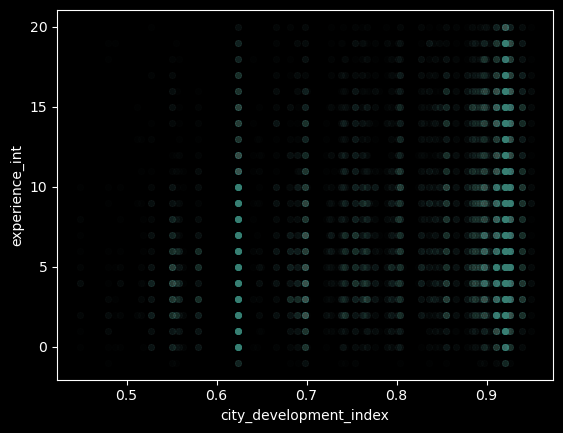

In [115]:
df[df['experience_int'] < 999].plot(x='city_development_index', y='experience_int', kind='scatter', alpha=0.01)

In [116]:
t = (df[df['experience_int'] < 999]
    .groupby('city_development_index_group_q')['experience_int']
    .agg(['count', 'mean', 'median']))

# Чем больше индекс, тем больше среднее кол-во лет опыта
t

,count,mean,median
city_development_index_group_q,,,
"(0.447, 0.691]",3768,5.603238,5.0
"(0.691, 0.878]",3408,7.936620,7.0
"(0.878, 0.92]",6733,8.576860,8.0
"(0.92, 0.949]",1963,9.099338,9.0


<AxesSubplot:xlabel='city_development_index_group_q'>

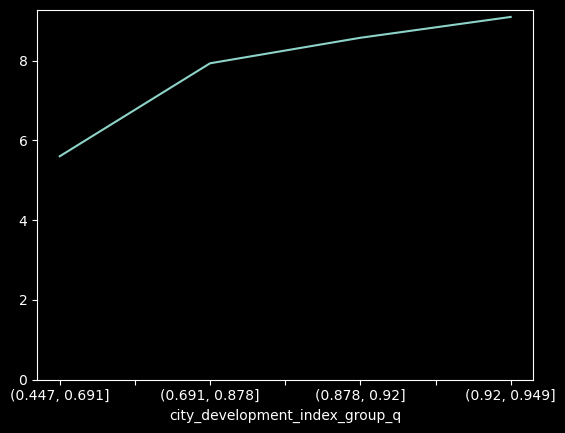

In [117]:
t['mean'].plot(ylim=0)

### Джойны

подгрузить из другой таблицы столбец с построчным соответствием к столбцу "enrollee_id"

In [118]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,new_col_1,new_col_2,city_development_index_group,city_development_index_group_q,city_development_index_group_q_custom,new_education_level,new_training_hours,experience_int,experience_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1.0,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36,999,"(18.0, 999.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0.0,1,0.258667,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47,15,"(11.0, 18.0]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0.0,1,0.208000,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83,5,"(4.0, 6.0]"


In [119]:
age = df[["enrollee_id"]].copy()

In [120]:
age['age'] = 30
age.head(3)

,enrollee_id,age
0,8949,30
1,29725,30
2,11561,30


In [121]:
df = df.merge(age, how='left', on='enrollee_id') # left - какой дф сохраняем (df(l).merge(age(r))
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,new_col_1,new_col_2,city_development_index_group,city_development_index_group_q,city_development_index_group_q_custom,new_education_level,new_training_hours,experience_int,experience_group,age
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1,0.306667,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36,999,"(18.0, 999.0]",30
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,1,0.258667,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47,15,"(11.0, 18.0]",30
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,1,0.208000,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83,5,"(4.0, 6.0]",30


In [122]:
len(df), len(age)

(19158, 19158)

In [123]:
len(age['enrollee_id'].drop_duplicates())

19158

In [9]:
df_1 = pd.DataFrame({'idx': [1,2,3,4,5], 'name': ['Max', 'Tony', 'Alex', 'Bob', 'Sara'], 'age': [26, 27 ,19, 30, 22]})
df_1

,idx,name,age
0,1,Max,26
1,2,Tony,27
2,3,Alex,19
3,4,Bob,30
4,5,Sara,22


In [10]:
df_2 = pd.DataFrame({'idx': [2,5,1,4,3], 'job': ['coordinator', 'engineer', 'UxUi', 'teacher', 'Web']})
df_2['idx'].drop_duplicates()
df_2

,idx,job
0,2,coordinator
1,5,engineer
2,1,UxUi
3,4,teacher
4,3,Web


In [11]:
df_1.merge(df_2, how='left', on='idx')

,idx,name,age,job
0,1,Max,26,UxUi
1,2,Tony,27,coordinator
2,3,Alex,19,Web
3,4,Bob,30,teacher
4,5,Sara,22,engineer


In [12]:
df_1 = df_1.set_index('idx')

In [13]:
df_2 = df_2.set_index('idx')

In [14]:
df_1.join(df_2, how='left')

,name,age,job
idx,,,
1,Max,26,UxUi
2,Tony,27,coordinator
3,Alex,19,Web
4,Bob,30,teacher
5,Sara,22,engineer


In [18]:
df_1 = pd.DataFrame({'idx': [1,2,3,4,5], 'name': ['Max', 'Tony', 'Alex', 'Bob', 'Sara'], 'age': [26, 27 ,19, 30, 22]})
df_2 = pd.DataFrame({'rtx': [2,5,1,4,3], 'job': ['coordinator', 'engineer', 'UxUi', 'teacher', 'Web']})

df_1 = df_1.merge(df_2, how='left', left_on='idx', right_on='rtx',  validate = '1:1')

In [19]:
df_1

,idx,name,age,rtx,job
0,1,Max,26,1,UxUi
1,2,Tony,27,2,coordinator
2,3,Alex,19,3,Web
3,4,Bob,30,4,teacher
4,5,Sara,22,5,engineer


In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df_1.job)

LabelEncoder()

In [23]:
enc.transform(['coordinator'])

array([2])

In [25]:
enc.inverse_transform([2])

array(['coordinator'], dtype=object)

### Numpy

In [131]:
type(df['city_development_index'].values)

numpy.ndarray

In [132]:
import numpy as np
import pandas as pd

In [133]:
np.mean([1,2,3,4,5])

3.0

In [134]:
np.mean(np.random.normal(size=1000))

-0.016826815430868287

In [135]:
np.linspace(0,100,5)

array([  0.,  25.,  50.,  75., 100.])

In [136]:
a = np.random.uniform(size=10)

In [137]:
pd.DataFrame(a)

,0
0,0.697589
1,0.933788
2,0.610853
3,0.674506
4,0.179000
5,0.311258
6,0.708197
7,0.334293
8,0.289046
9,0.009011


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Создайте DataFrame с текстовыми признаками
data = {'feature1': ['красный', 'синий', 'зеленый', 'фиолетовый'],
        'feature2': ['круг', 'квадрат', 'треугольник', 'круг'],
        'feature3': ['маленький', 'большой', 'средний', 'огромный']}
df = pd.DataFrame(data)
df_x = df[:].copy()

# Создайте объект LabelEncoder
label_encoder = LabelEncoder()

# Примените LabelEncoder к каждому столбцу с текстовыми данными
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Ваши числовые признаки теперь в DataFrame df
print(df)

   feature1  feature2  feature3
0         1         1         1
1         2         0         0
2         0         2         3
3         3         1         2


In [33]:
df_x

,feature1,feature2,feature3
0,красный,круг,маленький
1,синий,квадрат,большой
2,зеленый,треугольник,средний
3,фиолетовый,круг,огромный


In [34]:
df

,feature1,feature2,feature3
0,1,1,1
1,2,0,0
2,0,2,3
3,3,1,2


In [35]:
label_encoder.inverse_transform([1])

array(['маленький'], dtype=object)